# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/Dhriti/Desktop/fraudTest.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [3]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [4]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

In [5]:
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,333497,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0
4,2020-06-21 12:15:17,travel,3.19,1126,0
...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0
555717,2020-12-31 23:59:24,travel,7.99,129,0


# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [6]:
type(df_select["trans_date_trans_time"][0])

str

In [7]:
#df_select['time_var'] = pd.to_datetime(df["trans_date_trans_time"]).dt.hour
#df_select['time_var'] = [1 if 0<= i <=5 else 0 for i in df_select['time_var']]

In [8]:
#to capture of transaction happened on weekend or not
df_select['time_var'] = pd.to_datetime(df["trans_date_trans_time"]).dt.dayofweek
df_select['time_var'] = [1 if 0<= i <=5 else 0 for i in df_select['time_var']]

In [9]:
dummies = pd.get_dummies(df_select["category"])
x = pd.concat([dummies, df_select[["amt", "city_pop","time_var"]]], axis=1)
y = df["is_fraud"]

# 5.) Train a Logistic regression.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_reg = LogisticRegression().fit(x_scaled, y)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [14]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = log_reg.predict(x_scaled)

# Get the confusion matrix
conf = confusion_matrix(y, y_pred)

# Calculate the false positive rate (fpr = false positives / (true negatives + false positives))
fpr = conf[0,1] / (conf[0,0] + conf[0,1])

# Print the false positive rate
print("False Positive Rate:", fpr)


False Positive Rate: 0.0002836115858042466


A low False Positive Rate is good as we do not want to flag non-fraudulent transactions.

In [15]:
#But, if my FPR was higher and the company wanted to target a 5% FPR, 
#the loop below could be used to find the classification threshold that we could use to get a 5% FPR.

In [16]:
y_probs = log_reg.predict_proba(x_scaled)[:,1]

# Define the desired false positive rate
desired_fpr = 0.05

# Initialize the threshold
threshold = 0

# Initialize the f1_score
best_f1 = -1

for t in np.arange(0,1,0.01):
    y_pred = y_probs > t
    fpr = confusion_matrix(y, y_pred)[0,1] / (confusion_matrix(y, y_pred)[0,0] + confusion_matrix(y, y_pred)[0,1])
    if fpr <= desired_fpr:
        f1 = f1_score(y, y_pred)
        if f1>best_f1:
            best_f1 = f1
            threshold = t

# Make predictions using the optimal threshold
y_pred = (y_probs > threshold).astype(int)

print("Optimal threshold:", threshold)

Optimal threshold: 0.03


# 7.) Now, let us assume the Credit Card provider makes .02 on True transactions and loses -1 on False transactions.

In [17]:
conf = confusion_matrix(y, y_pred)
conf

array([[552033,   1541],
       [  1393,    752]])

In [18]:
gain = 0.02*(conf[0,0] + conf[1,1])
loss = -1*(conf[0,1] + conf[1,0])
total = gain + loss
print("Total gain/loss to the company", total)


Total gain/loss to the company 8121.700000000001


# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [19]:
from sklearn.linear_model import LassoCV

In [20]:
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model
logreg_lasso.fit(x_scaled, y)

# Make predictions
y_pred1 = logreg_lasso.predict(x_scaled)

In [21]:
pred_coeffs = logreg_lasso.coef_

In [22]:
pred_coeffs[0]


array([-0.06870237, -0.07658793,  0.1064071 ,  0.02373371,  0.4294619 ,
       -0.06888362, -0.11336804, -0.09716366,  0.32445759,  0.        ,
       -0.0100072 ,  0.4084087 ,  0.10282684, -0.91706045,  0.32969397,
       -0.1216851 , -0.02141455])

In [23]:
#getting the name of columns for plotting
coeffs = (x.columns)

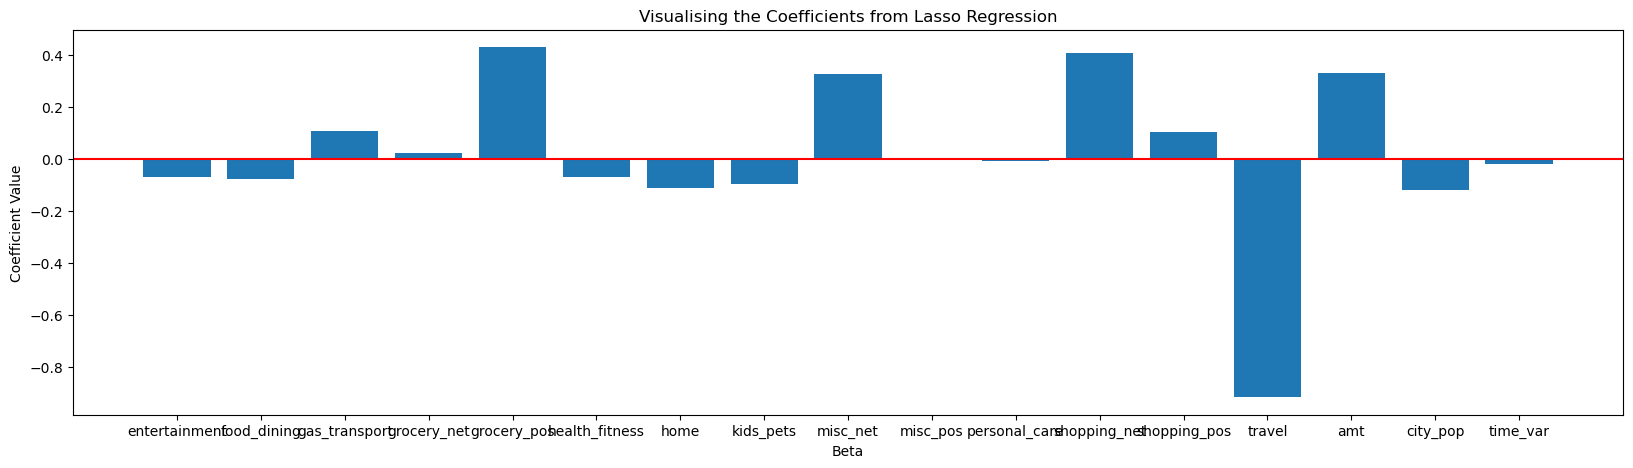

In [24]:
plt.figure(figsize = (20,5))
plt.bar(coeffs, pred_coeffs[0])
plt.axhline(0, color = "red")
plt.title("Visualising the Coefficients from Lasso Regression")
plt.xlabel("Beta")
plt.ylabel("Coefficient Value")
plt.show()

From the above graph shows that most of the chosen predictor values are significant in predicting the fraud class of each transaction. Variables  such as perhaps 'grocery_net', 'misc_pos', and 'personal_care' have coefficient value reduce to 0 indicating that they are not siginificant and would not be selected features in a trusted pedicted regression model.Cross validation and bootstrapping methods can be used to selection process of variable selection.